In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import pandas as pd
import networkx as nx
import numpy as np
pd.options.mode.chained_assignment = None 

import time

# Zero node

In [2]:
#Zero node
Node0 = 'login facebook'
dir_png = r"C:\Data_out" #directory for uploading graphs

# Data loading, preparation for processing

In [ ]:
start_time = time.time()

fname = r"C:\Data\graf_fb1.csv"
df = pd.read_csv(fname)
#drop equal row
G_df = df.drop_duplicates().copy() 

#list friends
f1 = G_df['NK1'].unique()

#removing duplicates of the 2nd node
G_df = G_df.drop(G_df[G_df['NK2']==Node0].index)

Node0_FIO = str(G_df.iloc[0]['FL_name1'])

print("Download ", (time.time() - start_time))

# Processing of uploaded data

In [208]:
start_time = time.time()
#marking levels
#0y - direct friends of the zero node
#1st - mutual friends
#2nd - unrelated friends of friends
##new column, 2nd level
G_df['level'] = 2
#1st level link with friends (mutual friends)
G_df.loc[ (G_df['NK2'].isin(f1)) & (G_df['NK1'] != Node0) & (G_df['NK2'] != Node0)  ,'level']=1
#0th level of links between the zero node and friends
G_df.loc[G_df['NK1']==Node0,'level'] = 0

#number by levels
print ('0st level - ', len(G_df[G_df['level']==0]))
print ('1st level - ', len(G_df[G_df['level']==1]))
print ('2st level - ', len(G_df[G_df['level']==2]))
print ('must be - ', len(G_df) ,' Realy - ' ,len(G_df[G_df['level']==2]) + len(G_df[G_df['level']==0]) + len(G_df[G_df['level']==1]) )

#adjust colors and line thickness
#0y red
G_df.loc[G_df['level']==0,'color'] = 'r'
G_df.loc[G_df['level']==0,'w'] = 0.6
#1й голубой (общие друзья)
G_df.loc[G_df['level']==1, 'color'] = 'b'
G_df.loc[G_df['level']==1,'w'] = 0.3
#3й зеленый
G_df.loc[G_df['level']==2,'color'] = 'g'
G_df.loc[G_df['level']==2,'w'] = 0.15
print("Download ", (time.time() - start_time))

0й уровень -  179
1й уровень -  478
2й уровень -  16967
Должно быть -  17624  Реально -  17624
Download  0.0792241096496582


# General graph

In [17]:
start_time = time.time()
#загружаем в граф
G = nx.from_pandas_edgelist(G_df, 'FL_name1', 'FL_name2',edge_attr=['color','w'])
print('Загружено', len(G.edges) , 'ребер')
edges = G.edges()
colors_edge = [G[u][v]['color'] for u,v in edges]
w_edge = [G[u][v]['w'] for u,v in edges]

#Все вместе
plt.figure(figsize=(150,150),dpi=60)
nx.draw_networkx(G, width=w_edge, edge_color = colors_edge, node_color = 'k', node_size = 3 ,font_color='darkblue',font_size=8)
plt.axis('off')
plt.savefig(_Node0+"_graph_FB_all.png")
plt.close()
print("Drow ", (time.time() - start_time), " sec.")

Загружено 17377 ребер


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


Drow  952.3371312618256  sec.


# Graph - common acquaintances

In [210]:
start_time = time.time()
#loading into the graph
#without the 2nd level
G_df2 = G_df.drop(G_df[G_df['level']==2].index)
#0st red
G_df2.loc[G_df['level']==0,'color'] = 'silver'
G_df2.loc[G_df['level']==0,'w'] = 0.2
#1st blue (mutual friends)
G_df2.loc[G_df['level']==1, 'color'] = 'b'
G_df2.loc[G_df['level']==1,'w'] = 0.6

G2 = nx.from_pandas_edgelist(G_df2, 'FL_name1', 'FL_name2',edge_attr=['color','w'])
print('Download', len(G2.edges) , 'edge')
edges2 = G2.edges()
colors_edge = [G2[u][v]['color'] for u,v in edges2]
w_edge = [G2[u][v]['w'] for u,v in edges2]


plt.figure(figsize=(80,80),dpi=100)
nx.draw_networkx(G2, width=w_edge, edge_color = colors_edge, node_color = 'k', node_size = 3 ,font_color='r',font_size=8)
plt.axis('off')
plt.savefig(dir_png+"\\"+Node0+"_graph_FB_onlyFR.png")
plt.close()
print("Drow ", (time.time() - start_time))

Загружено 524 ребер


<IPython.core.display.Javascript object>

Drow  5.766183853149414


# Visualization of nodes by degree

<IPython.core.display.Javascript object>


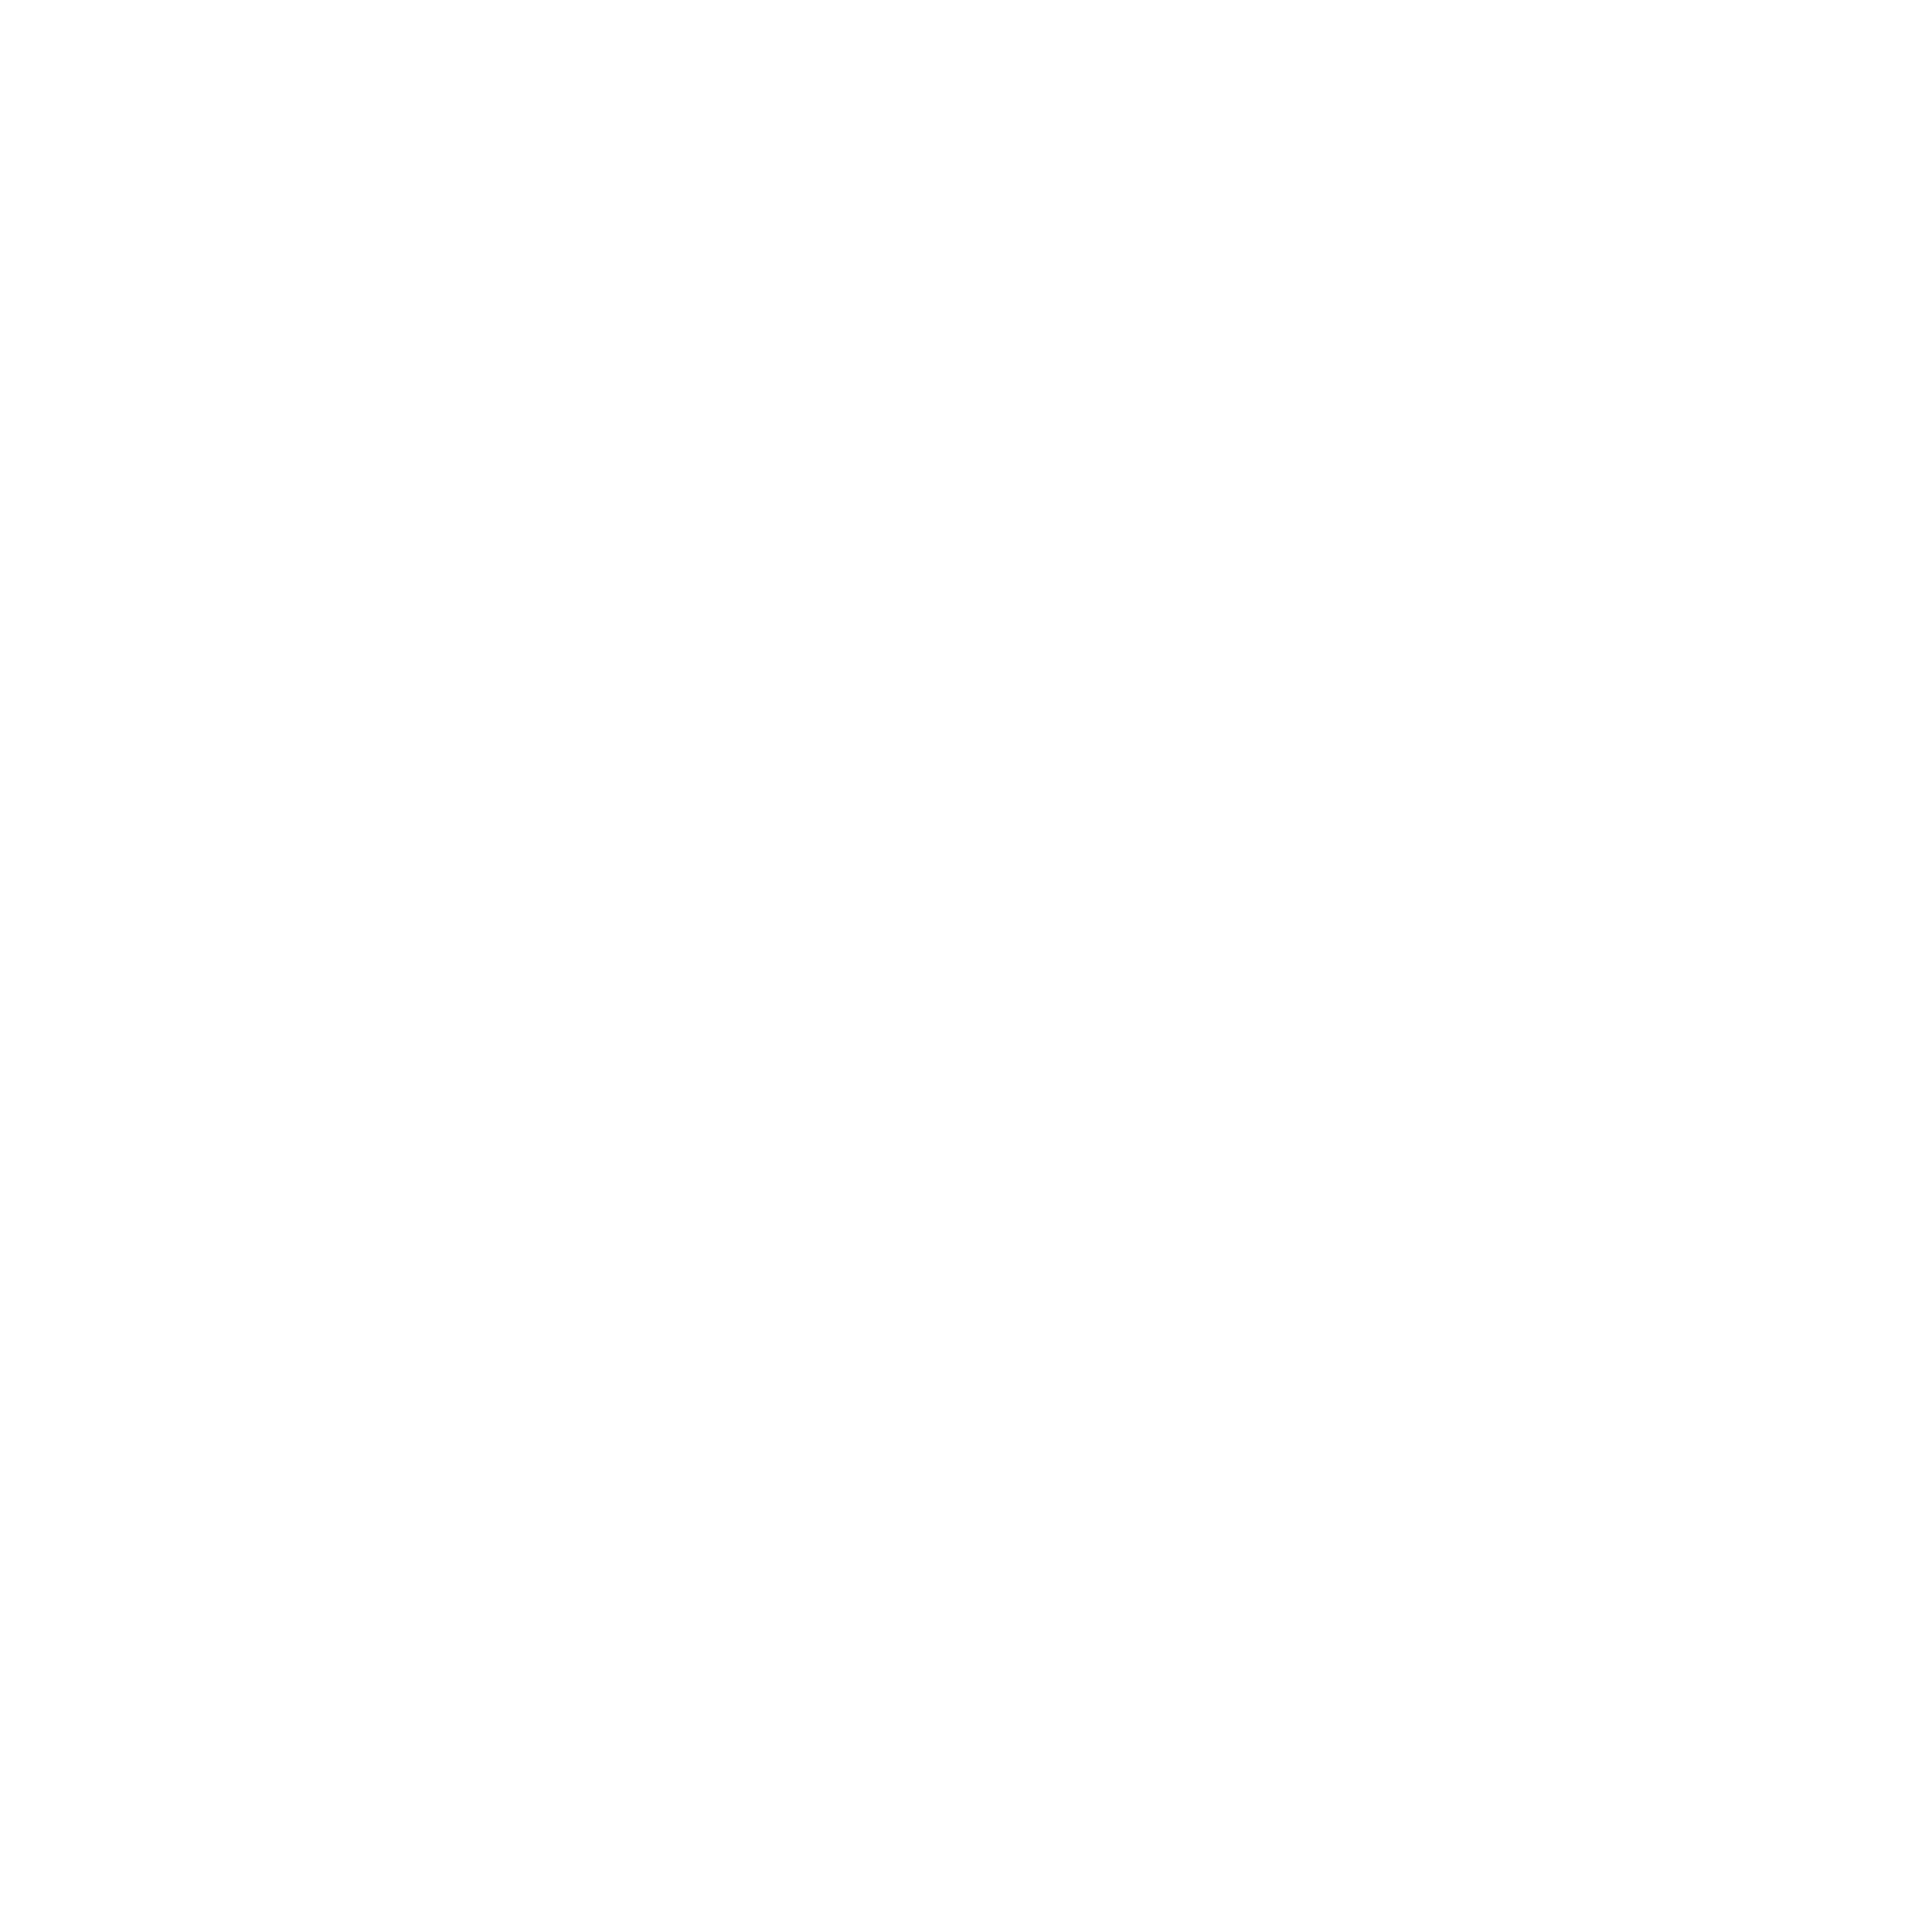

Drow  0.32105183601379395  sec.


In [71]:
start_time = time.time()

#node degree
degree = 1

G3 = G2
edges3 = G3.edges()

nd = []
for v in G3:
    #print(v)
    if G3.degree(v) == degree:
        nd.append(v)
      
    
for u,v in edges2 :
    if G3[u][v]['color']=='silver':
        G3[u][v]['color']='w' 
        
colors_edge = [G3[u][v]['color'] for u,v in edges3]
        
plt.figure(figsize=(20,20),dpi=100)
pos=nx.spring_layout(G3)
nx.draw_networkx(G3, pos, width=0.1, edge_color = colors_edge, node_color = 'k', font_color='r',font_size=8, node_size = 10)
nx.draw_networkx_nodes(G3, pos, nodelist=nd, node_color='aqua',node_size = 800)

plt.axis('off')
plt.savefig(dir_png+"\\"+Node0+"_degr"+str(degree)+"_graph_FB_Degr.png")
plt.close()
print("Drow ", (time.time() - start_time), " sec.")

# Graph Analysis

In [211]:
#Friends and connections between them
G_df4 = G_df.drop(G_df[G_df['level']==2].index)
#0st red
G_df4.loc[G_df['level']==0,'color'] = 'silver'
G_df4.loc[G_df['level']==0,'w'] = 0.2
#1st blue (mutual friends)
G_df4.loc[G_df['level']==1, 'color'] = 'b'
G_df2.loc[G_df['level']==1,'w'] = 0.6

G4 = nx.from_pandas_edgelist(G_df2, 'FL_name1', 'FL_name2',edge_attr=['color','w'])
print('Download', len(G2.edges) , 'edges')
print('Download', len(G2.nodes) , 'nodes')

Загружено 524 ребер
Загружено 179 узлов


In [219]:
#Number of areas
G4.remove_node(Node0_FIO)
nx.number_connected_components(G4)

33

In [224]:
#sizes of isolated groups
l = []
con = sorted(nx.connected_components(G4))
for i in range(len(con)):
    l.append(len(con[i]))

print (l)

[141, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [220]:
#composition of isolated groups with a number of participants less than 10 and more than 2
con = sorted(nx.connected_components(G4))
for i in range(len(con)):
    if (len(con[i])<10) & (len(con[i])>1) :
        print(con[i])

{'Тагир Будаев', 'Bogdan Kovalevsky'}
{'Дарья Мазур', 'Дарья Шепелева'}
{'Илья Самсонов', 'Владимир Боровой', 'Павел Стружкин', 'Владимир Петрашев'}


In [167]:
degree = 0
#list of nodes to delete
del_nodes = []
for v in G4:
     if G4.degree(v) == degree:
        del_nodes.append(v)

In [168]:
print("There will be no nodes left- ", (len(G4.nodes) - len(del_nodes)))

Останется узлов-  554


In [213]:
G4.remove_node(Node0_FIO)

In [174]:
len(G4.edges)

4238

<IPython.core.display.Javascript object>


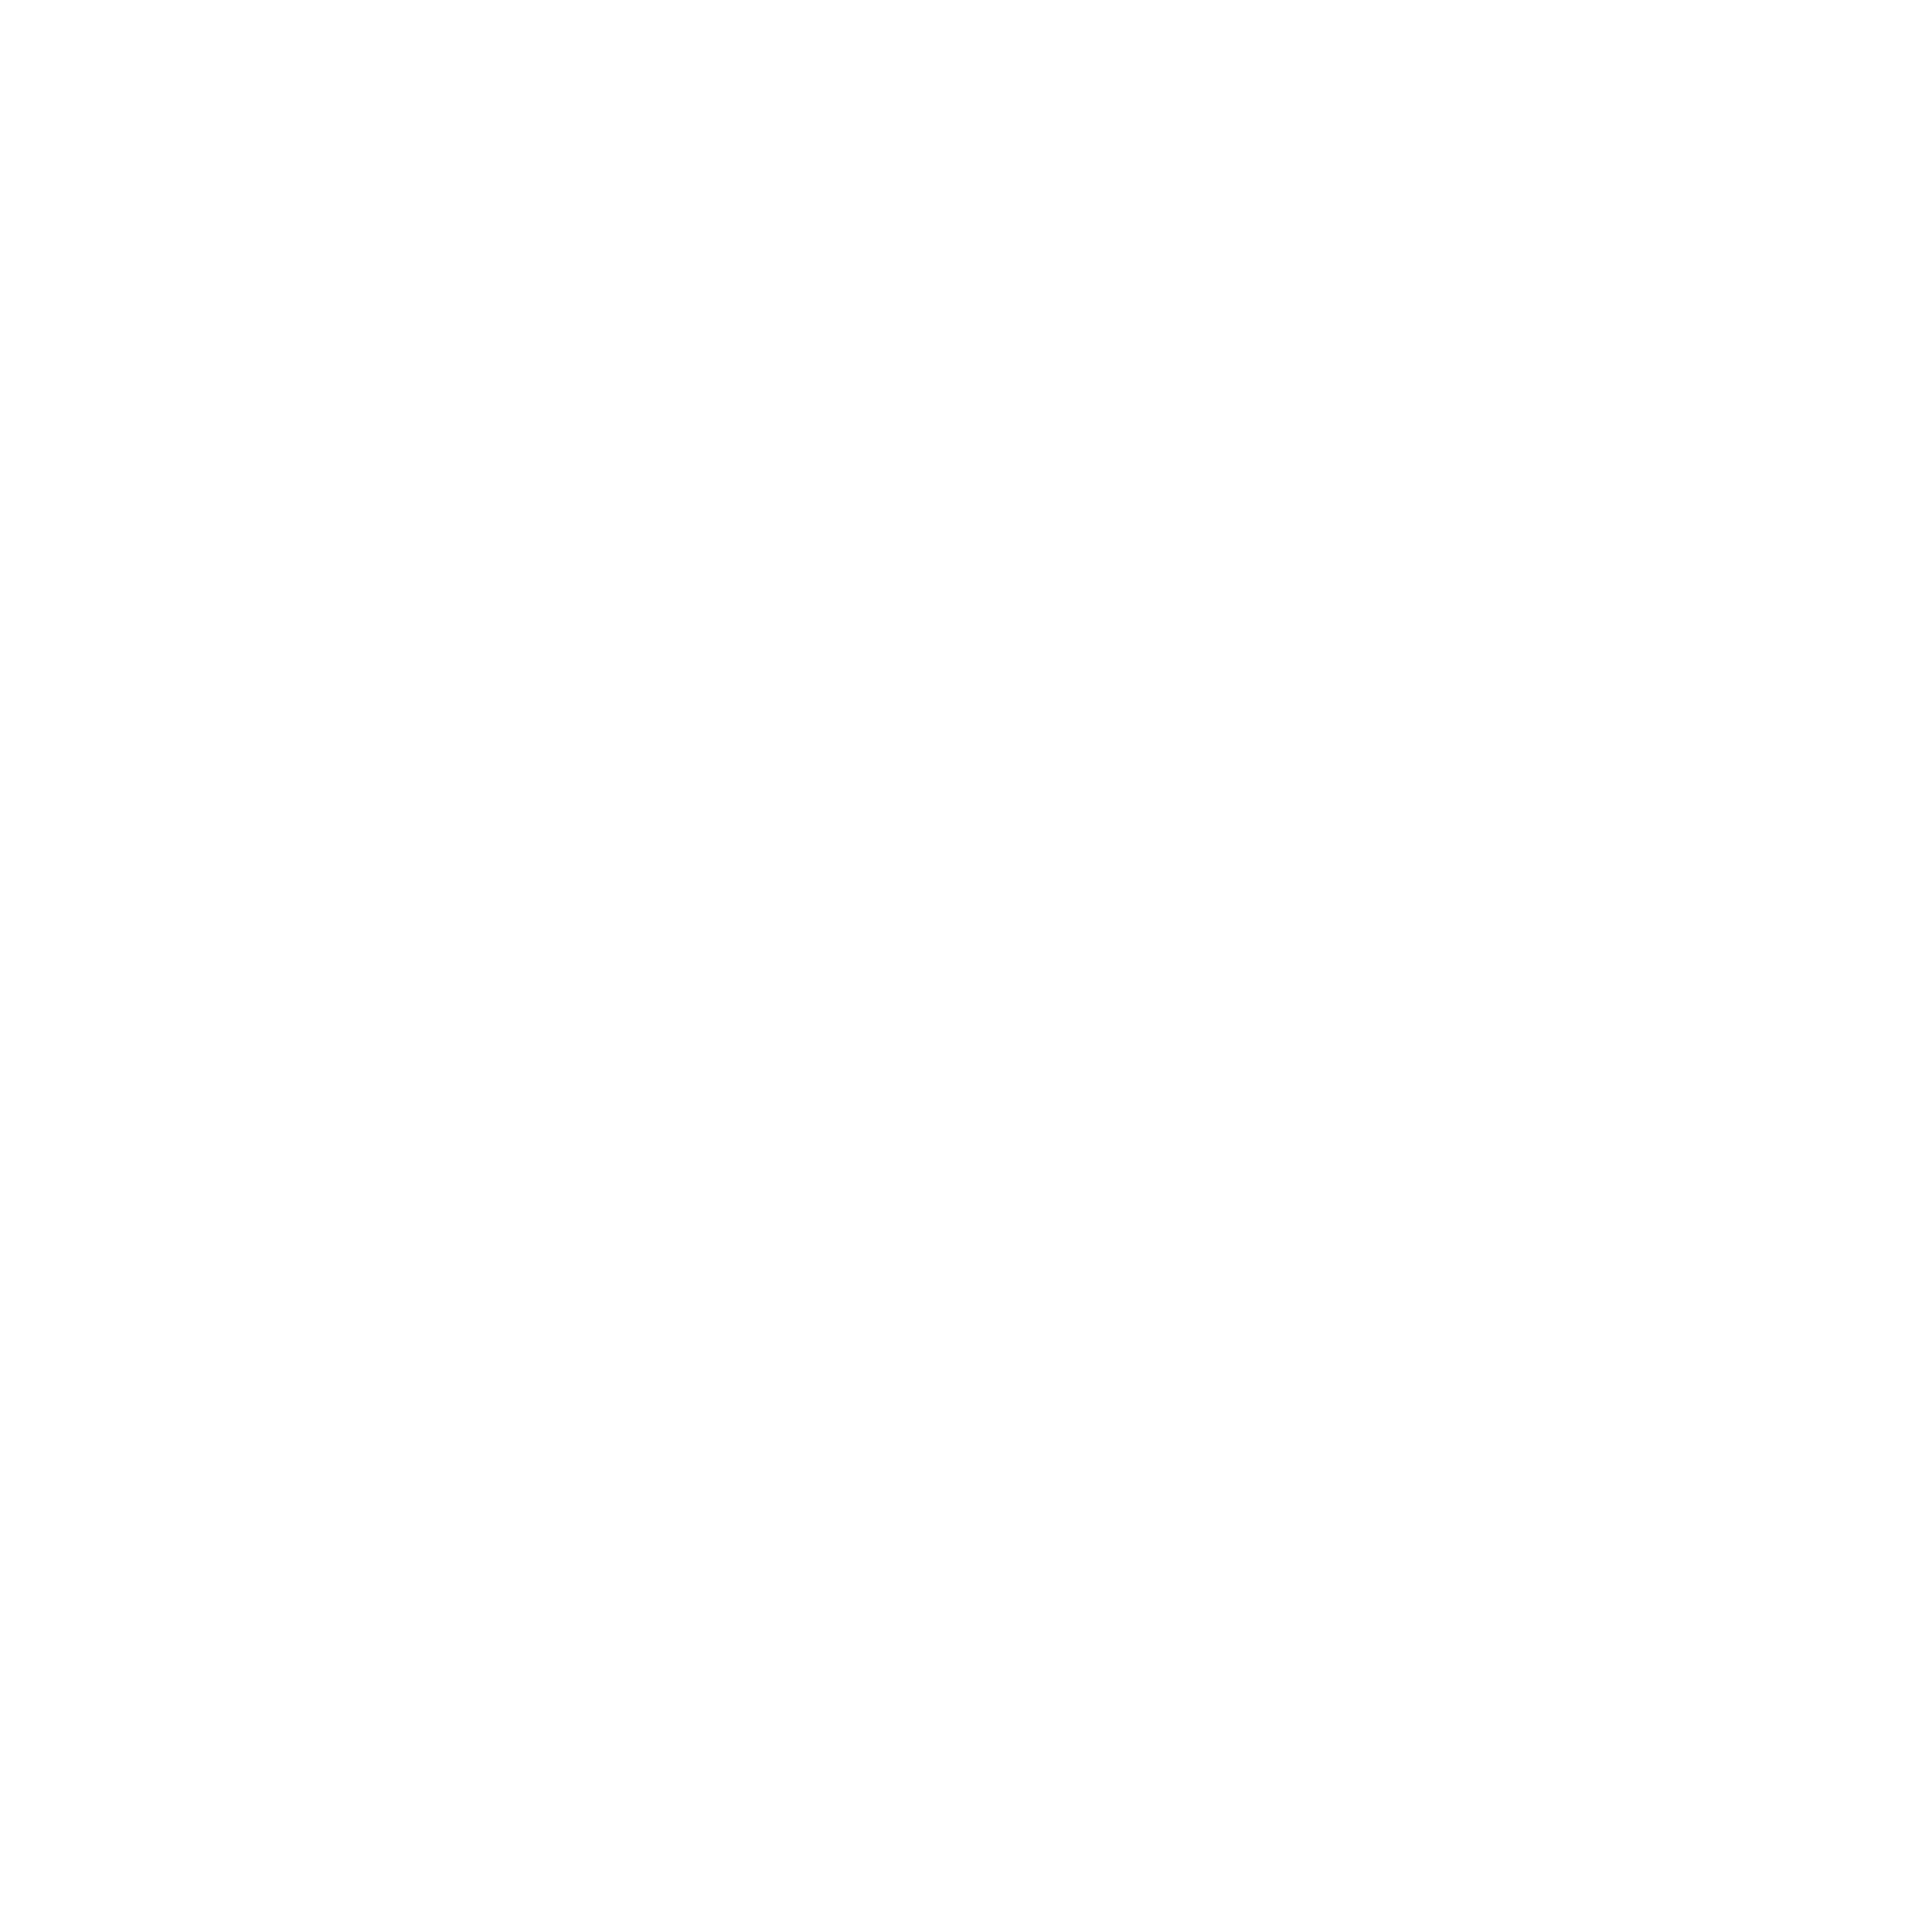

In [175]:
plt.figure(figsize=(20,20),dpi=100)
pos=nx.spring_layout(G4)
nx.draw_networkx(G4, pos)
plt.axis('off')
plt.savefig(dir_png+"\\"+Node0+"_degr"+str(degree)+"_graph_FB_GroupDegr.png")
plt.close()

<IPython.core.display.Javascript object>


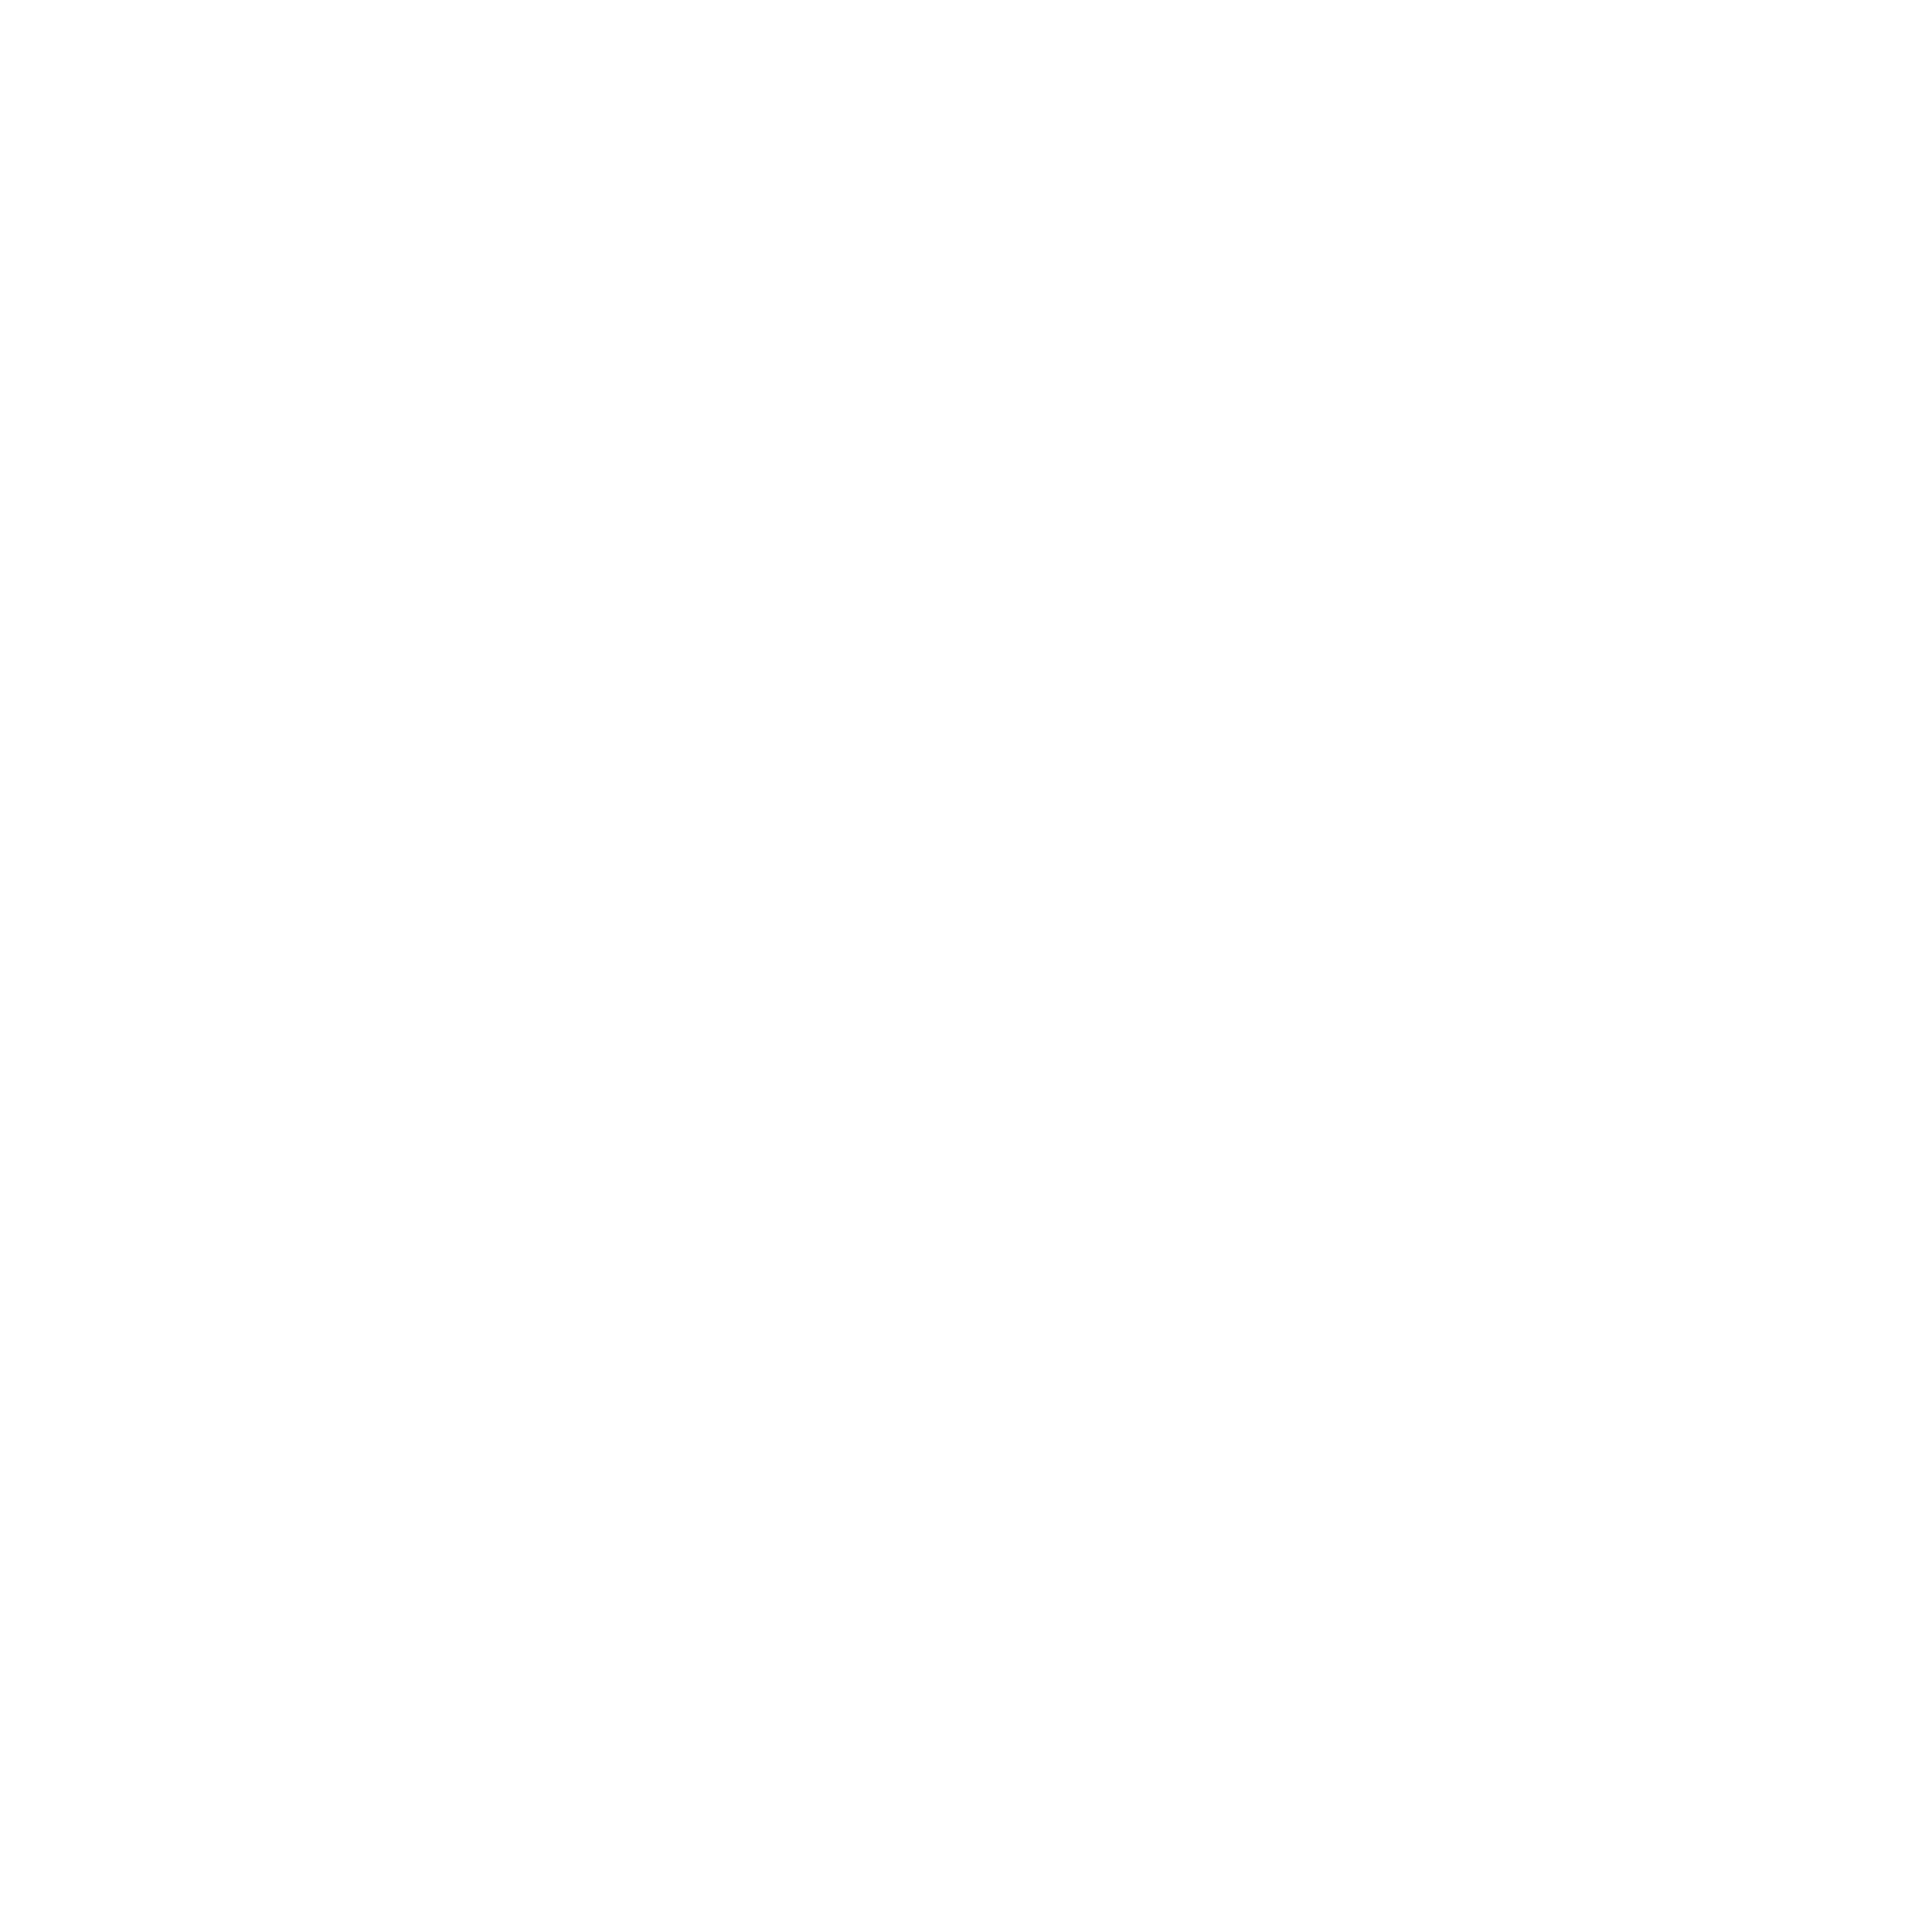

Drow  0.4132518768310547  sec.


In [60]:
start_time = time.time()
G4 = G2
tmp = G2
edges4 = G4.edges()
nodes4 = G4.nodes()

#node degree
degree = 2

#list of nodes to delete
del_nodes = []
for v in G4:
     if G4.degree(v) != degree:
        del_nodes.append(v)

G4.remove_nodes_from(del_nodes)
        
colors_edge = [G4[u][v]['color'] for u,v in edges4]
        
plt.figure(figsize=(20,20),dpi=100)
pos=nx.spring_layout(G4)
nx.draw_networkx(G4, pos, width=0.1, edge_color = colors_edge, node_color = 'k', font_color='r',font_size=8, node_size = 10)
#nx.draw_networkx_nodes(G4, pos, nodelist=nd_dgr, node_color='aqua',node_size = 800)

plt.axis('off')
plt.savefig(dir_png+"\\"+Node0+"_degr"+str(degree)+"_graph_FB_GroupDegr.png")
plt.close()
print("Drow ", (time.time() - start_time), " sec.")

# For example

In [129]:
G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

In [140]:
G1.nodes()

NodeView((0, 1, 2, 3, 5, 6, 4, 7, 8, 9))

In [143]:
for node in G1.neighbors(0):
    print(node)

1
2
3
5


In [142]:
visited

{0, 1, 2, 3, 4, 5, 6, 8}

<IPython.core.display.Javascript object>


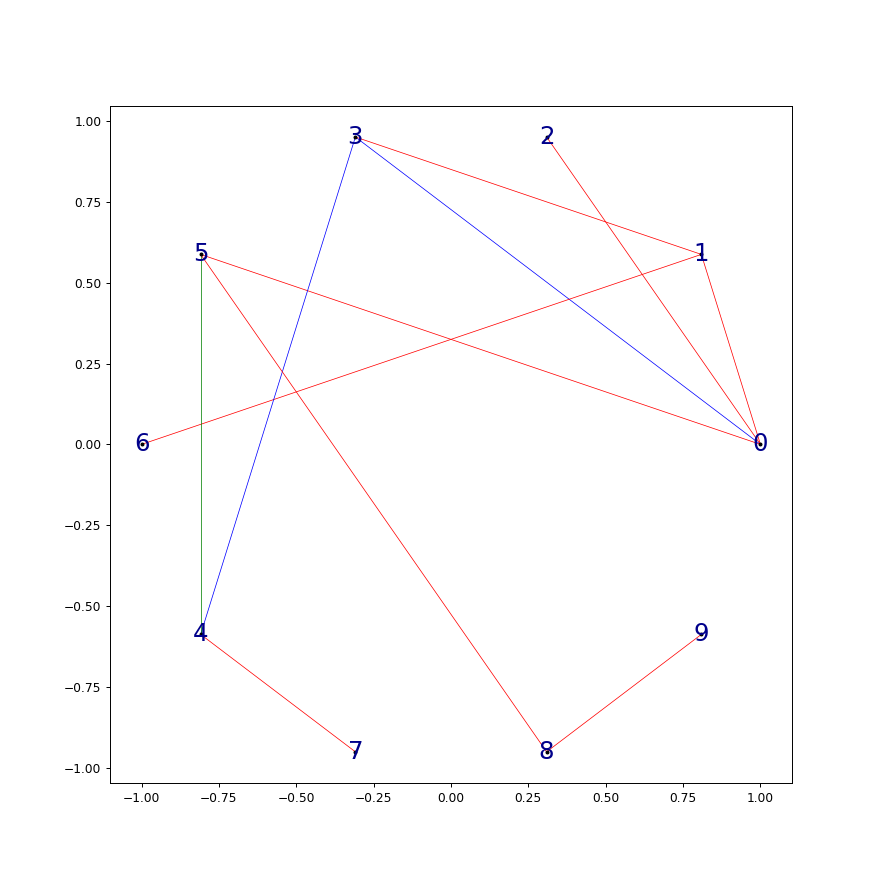

In [154]:
#plt.figure(figsize=(10,10))
#pos = nx.circular_layout(G1)
#nx.draw_networkx(G1)
plt.figure(figsize=(10,10),dpi=80)

c1=['r','r','b','r','r','r','b','g','r','r','r']


pos = nx.circular_layout(G1)
#pos = nx.spring_layout(G1)
#pos = nx.shell_layout(G1)
#pos = nx.spectral_layout(G1)

nx.draw_networkx(G1, pos, width=0.6, edge_color = c1, node_color='k', node_size = 5 ,font_color='darkblue',font_size=20)
#plt.savefig("_graph.png")
#plt.close()

In [87]:
nx.draw_networkx?